# MNIST dataset

In [1]:
from __future__ import division

In [2]:
import numpy as np

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

### Dataset loading

In [6]:
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [8]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# To categorical 

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Sample visualization

In [11]:
import matplotlib.pyplot as plt

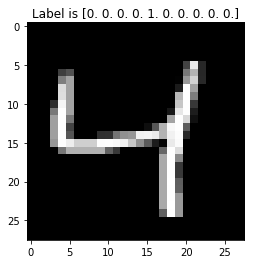

In [12]:
sample_index = 2

pixels = x_train[sample_index]
label = y_train[sample_index]

plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels[:,:,0], cmap='gray')
plt.show()

### Define network architecture

In [13]:
model = Sequential()

# Two conv2d (32) + maxpool + dropout
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 14 x 14 x 32

# Two conv2d (32) + maxpool + dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 7 x 7 x 64

# Flatten
model.add(Flatten())

# First FC layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(10, activation='softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

### Train model

In [15]:
# Various hyperparameters
batch_size = 128
epochs = 20

In [16]:
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.5762 - acc: 0.8198 - val_loss: 0.1322 - val_acc: 0.9587
Epoch 2/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.1507 - acc: 0.9534 - val_loss: 0.0708 - val_acc: 0.9778
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0986 - acc: 0.9684 - val_loss: 0.0498 - val_acc: 0.9829
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0782 - acc: 0.9755 - val_loss: 0.0421 - val_acc: 0.9850
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0664 - acc: 0.9791 - val_loss: 0.0393 - val_acc: 0.9861
Epoch 6/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0583 - acc: 0.9819 - val_loss: 0.0314 - val_acc: 0.9890
Epoch 7/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0502 - acc: 0.9839 - val_loss: 0.0302 - val_ac